In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset="WikiTitles"
# dataset="Amazon"


In [32]:
# dataset="WikiSeeAlsoTItles"
file = "/Users/sy/Desktop/MIT/clusterer/data/%s.cmty" % dataset
# dataset = "friendster"
# file = "/Users/sy/Desktop/MIT/clusterer/data/com-friendster.top5000.cmty.txt"
# Define an empty list to store the data
data = []

# Open the file for reading
with open(file, "r") as file:
    # Iterate over each line in the file
    for line in file:
        # Split the line into individual values and convert them to integers
        row = [int(value) for value in line.strip().split("\t")]
        # Append the row to the data list
        data.append(row)

cluster_sizes = np.array([len(i) for i in data])
# longest list
ind = np.argmax(cluster_sizes)
print("largest", len(data[ind]))

largest 399353


In [40]:
# Compute the histogram using numpy
hist, bins = np.histogram(cluster_sizes, bins=100)  # Adjust the number of bins as needed

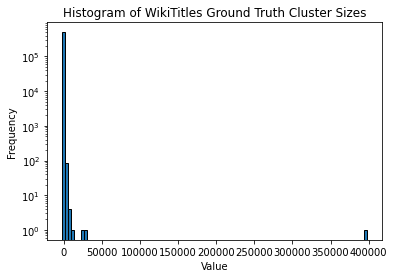

In [41]:
# Plot the histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of %s Ground Truth Cluster Sizes' % dataset)
plt.yscale('log')
plt.savefig("../results/ground_truth_hist_%s.pdf" % dataset, bbox_inches='tight')

In [39]:
hist

array([174999, 101865,  57677, ...,      0,      0,      1])

In [42]:
hist

array([498990,     83,      4,      1,      0,      0,      1,      1,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      1])

In [43]:
import numpy as np

# Example embedding matrix with two vectors
embedding = np.array([[1, 2, 3], [4, 5, 6]])

# Normalize each vector to have a unit norm
normalized_embedding = embedding / np.linalg.norm(embedding, axis=-1, keepdims=True)

print(normalized_embedding)


[[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]]


In [47]:
file = "/Users/sy/Desktop/MIT/clusterer/data/WikiTitles_palm_k10.ungraph.txt"

In [48]:
# Load data skipping the first three rows
data = np.genfromtxt(file, skip_header=3)

# Extracting FromNodeId, ToNodeId, and Weight into separate arrays
from_node_ids = data[:, 0].astype(int)
to_node_ids = data[:, 1].astype(int)
weights = data[:, 2]

<BarContainer object of 100 artists>

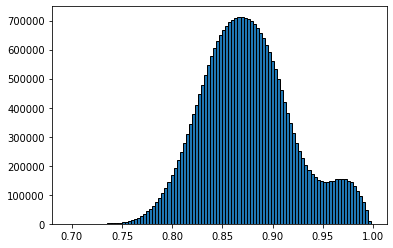

In [50]:
hist, bins = np.histogram(weights, bins=100)  
# Plot the histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black')

In [51]:
bins

array([0.69672748, 0.6997602 , 0.70279293, 0.70582565, 0.70885838,
       0.7118911 , 0.71492383, 0.71795655, 0.72098928, 0.724022  ,
       0.72705473, 0.73008745, 0.73312018, 0.7361529 , 0.73918563,
       0.74221836, 0.74525108, 0.74828381, 0.75131653, 0.75434926,
       0.75738198, 0.76041471, 0.76344743, 0.76648016, 0.76951288,
       0.77254561, 0.77557833, 0.77861106, 0.78164378, 0.78467651,
       0.78770923, 0.79074196, 0.79377468, 0.79680741, 0.79984013,
       0.80287286, 0.80590559, 0.80893831, 0.81197104, 0.81500376,
       0.81803649, 0.82106921, 0.82410194, 0.82713466, 0.83016739,
       0.83320011, 0.83623284, 0.83926556, 0.84229829, 0.84533101,
       0.84836374, 0.85139646, 0.85442919, 0.85746191, 0.86049464,
       0.86352736, 0.86656009, 0.86959282, 0.87262554, 0.87565827,
       0.87869099, 0.88172372, 0.88475644, 0.88778917, 0.89082189,
       0.89385462, 0.89688734, 0.89992007, 0.90295279, 0.90598552,
       0.90901824, 0.91205097, 0.91508369, 0.91811642, 0.92114

In [54]:
np.sum(weights == 1)

716

In [55]:
file = "/Users/sy/Desktop/MIT/clusterer/data/AmazonTitles_palm_k10.ungraph.txt"

In [56]:
# Load data skipping the first three rows
data2 = np.genfromtxt(file, skip_header=3)

In [58]:
weights2 = data2[:, 2]
np.sum(weights2 == 1)

375074

<BarContainer object of 100 artists>

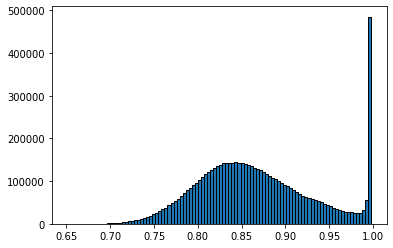

In [59]:
hist, bins = np.histogram(weights2, bins=100)  
# Plot the histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), edgecolor='black')

(array([     50,      51,      52, ..., 6374622, 6374632, 6374672]),)

In [83]:
same = data2[np.where(weights2 == 1)]

In [88]:
for (i,j,t) in same:
    i = int(i)
    j = int(j)
    if text[i]!=text[j]:
        print(i,j,t)
        print(text[i])
        print(text[j])
        break

In [96]:
t = []
for i in set(set(same[:,0]).union(set(same[:,1]))):
    i = int(i)
    t.append(text[i])

In [ ]:
len()

In [97]:
from collections import Counter


In [99]:
# Count occurrences
counts = Counter(t)

# Print the counts
for item, count in counts.most_common():
    print(f"{item}: {count}")

Amazon.com: Dickies Men's Original 874 Washed Work Pant: Clothing: 550
Timberland Men's Euro Hiker Leather And Fabric Boot: 311
Best of: 265
Amazon.com: Pinpoint Oxford Tab Collar Button Cuff Dress Shirt: Clothing: 261
Amazon.com: Paul Fredrick Men's Cotton Pinpoint Oxford Straight Collar Dress Shirt: Clothing: 256
Amazon.com: Port &amp; Company Cotton Short-Sleeve T-Shirt (PC61) Available in 52 Colors: Clothing: 256
Timberland Men's Field Boot: 254
Amazon.com: Imperial 100s Traditional Straight Collar French Cuff Dress Shirt: Clothing: 247
Amazon.com: Paul Fredrick Men's Non-Iron 100% Cotton 80s 2-Ply Pinpoint Button Down Collar Button Cuff: Clothing: 237
Amazon.com: Imperial 100s Windsor Spread Collar Button Cuff Dress Shirt: Clothing: 219
Fila Men's F-13 Sneaker: 218
Amazon.com: Imperial 100s European Straight Collar French Cuff Dress Shirt: Clothing: 217
Amazon.com: Imperial 100s European Straight Collar Button Cuff Dress Shirt: Clothing: 213
Greatest Hits: 210
Naturalizer Scout Wi

Schubert: Winterreise: 4
The Other Woman: 4
Amazon.com: Champion 9&quot; Power Liner: Clothing: 4
Clinique Quickliner For Eyes: 4
The Good, the Bad and the Ugly [VHS] (1967): 4
Run, Lola, Run (1999): 4
Needful Things [VHS] (1993): 4
Captain Kidd (1945): 4
James and the Giant Peach [VHS] (1996): 4
Caddie Woodlawn: 4
Mighty Aphrodite [VHS] (1996): 4
Almost Famous (2000): 4
It Ain't Easy: 4
PASHA For Men By CARTIER Eau de Toilette Spray: 4
Double Thick Nylon Deluxe Dog Collar in Red: 4
Amazon.com: National Classic Cardigan Sweater: Clothing: 4
Jerry Maguire (1996): 4
Sticks & Stones: 4
Dragonheart (1996): 4
Twister (1996): 4
Twins (1988): 4
No Boundaries: 4
Johnny Tremain: 4
Coco Mademoiselle by Chanel for Women, Eau De Toilette Spray: 4
Pet Sounds: 4
Spaceballs (1987): 4
Toy Story [VHS] (1995): 4
Bee Movie Game: 4
Amazon.com: WeekenderÂ® Men's Trader 6-Pocket Cargo Short - 32 Khaki: Clothing: 4
Loose Screw: 4
Ateco Ultra Spatulas: 4
Domestic Disturbance (2001): 4
Modern Art: 4
Poison: 4


Innova DX Archangel: 3
Seven pillars of wisdom,: A triumph: 3
From Elvis in Memphis: 3
Wise Hunting/Fishing Fold-Down Seat: 3
Tweekend: 3
FIFA Soccer 2005: 3
Shame: A Novel: 3
Amazon.com: Thermal-lined Zipper Hooded Sweatshirt: Clothing: 3
Rochas Man Eau de Toilette for Men by Rochas: 3
What Smart Women Know: 3
Light a Penny Candle: 3
From Dusk Till Dawn [VHS] (1996): 3
Celtic Woman: 3
Five Easy Pieces (1970): 3
Awakenings (1990): 3
Look Who's Talking (1989): 3
Photography: 3
The Beautiful and Damned: 3
Office Space (1999): 3
Amazon.com: Bridgedale Endurance Trekker Socks,Green,Large: Clothing: 3
Reach: 3
Little Deuce Coupe: 3
NBA Live 2005: 3
The life of Francis Marion: 3
Bronco Billy [VHS] (1980): 3
Alice in Wonderland [VHS] (1951): 3
Thunder & Lightning: 3
Cichlids Gold Pellet Fish Food: 3
To Gillian on Her 37th Birthday [VHS] (1996): 3
Blue Streak (1999): 3
Two Worlds: 3
Battlestar Galactica: 3
Blueprint: 3
Tootsie [VHS] (1982): 3
Quatermass 2 [VHS] (1957): 3
The Road Warrior [VHS]

Luminous Skin Colour Ultra Sheer Foundation SPF 25+: 2
Working Women in America: Split Dreams: 2
Naked [VHS] (1994): 2
Falling Down [VHS] (1993): 2
Capezio Women's 321 Pedini Shoe: 2
Wherever I May Roam: 2
Exercises: 2
New 3x5 National Flag of India Indian Country Flags: 2
Aquinas (Pelican books): 2
Paul Ricoeur (Routledge Critical Thinkers): 2
Jungle Fever (1991): 2
The Christmas Box: 2
Slugs: 2
Flags: 2
Nerve Damage: 2
The Butterfly: 2
Secrets of the Samurai: The Martial Arts of Feudal Japan: 2
Act of Treason: The Role of J. Edgar Hoover in the Assassination of President Kennedy: 2
Strictly Personal: 2
Teaching from the Heart: Theology and Educational Method: 2
Unreal Tournament 2004: 2
Happy Together: 2
The Short Stories of Langston Hughes: 2
Collected Prose: 2
Living Out Loud: 2
Mad Hatter: 2
Solo Collection: 2
The World Is Not Enough [VHS] (1999): 2
Dancing on Dangerous Ground (1999): 2
Can't Breathe: 2
The Ipcress File [VHS] (1965): 2
Emoh: 2
Cold Feet: 2
Amazon.com: Pirate Costu

Natural Sounds of Costa Rica: 2
Strange But True: 2
Dreaming Out Loud: 2
While You Were Sleeping [VHS] (1995): 2
Tricycle : the Buddhist Review: 2
The Rebels of Ireland: The Dublin Saga: 2
Private Eye - England: 2
Mrs. Doubtfire (1993): 2
Broken Arrow (1996): 2
Bless You: 2
Small Town England: 2
Out of Your Mind: 2
Mastering Autodesk Architectural Desktop 2006: 2
Editing Fact and Fiction: A Concise Guide to Book Editing: 2
Psycho (1960): 2
On An Island: 2
The origin of species by means of natural selection, or, The preservation of favored races in the struggle for life: 2
Fled [VHS] (1996): 2
Live Wire: 2
Showgirls (1995): 2
Tattooed Heart: 2
Riding in Cars with Boys [VHS] (2001): 2
2000 Fold: 2
He that is spiritual: 2
O Jerusalem: 2
Thomas & Friends: Henry and the Elephant (2008): 2
Beautiful Thing (1996): 2
Murder in Greenwich (2002): 2
Granuaile: 2
Zoetrope: 2
Night Light for Parents: A Devotional: 2
Jui kuen: 2
Demetrius and the Gladiators (1954): 2
A Ghost Is Born: 2
Toast: 2
Publ

Booty Call [VHS] (1997): 2
Balto (1995): 2
Forsaken: 2
Probability and Stochastic Processes: A Friendly Introduction for Electrical and Computer Engineers: 2
Information Seeking in Electronic Environments (Cambridge Series on Human-Computer Interaction): 2
Portmeirion Pomona Salad Bowl: 2
French Touch: 2
The hole book: 2
Anthology for Musical Analysis: 2
Twinlab Ascorbate C powder: 2
Creepshow 2 [VHS] (1987): 2
Back to My Roots: 2
Westworld: 2
Wreck of the Day: 2
Pastimes: The Context of Contemporary Leisure: 2
Deconstructing Harry (1997): 2
Worldwide: 2
Naturalizer Women's Detail Nubuck Mule: 2
Pheromone Perfume by Marilyn Miglin for women Personal Fragrances: 2
John Paul II: The Encyclicals in Everyday Language: 2
Rough Cider: 2
Don't Believe the Truth: 2
Civil War: 2
PG Tips 240ct Tea Bags: 2
Understanding Boat Design: 2
Roulette Girl: 2
Light Years [Vinyl]: 2
Real Women Have Curves (2002): 2
HP 78 Remanufactured Tri-Color Ink Cartridge: 2
Life with Mikey (1993): 2
Bijan Wicked Eau 

Terms of Endearment [VHS] (1983): 2
Eye to Eye: 2
Swept Away: 2
Amazon.com: ExOfficio Men's Give-N-Go Tee: Clothing: 2
The Wash (2001): 2
The Wash [VHS] (2001): 2
Caught Up (1998): 2
Spur Gear, 20 Degree Pressure Angle, Polyoxymethylene, Inch, 20 Pitch, 2.050&#034; Pitch Diameter, 0.312&#034; Bore, 2.050&#034; OD, 41 Teeth: 2
Dopoguerra: 2
Sunset Riders: 2
Winx Club: The Quest For The Codex: 2
Little Girl Blue: 2
Konfusion: 2
Amazon.com: Vanity Fair Women's Spinslip Full Tailored Slip #10158: Clothing: 2
Sinful Skinful: 2
A Bell for Adano: 2
Tony Hawk Pro Skater 4: 2
Elite 6-Inch Mini Thermostatic Heater: 2
Dietz Original Brass Trim Oil Lantern: 2
Oxford Illustrated Computer Dictionary: 2
Coin World: 2
MLB 06 The Show: 2
Amazon.com: Port Authority LP79 Ladies R-Tek Fleece Vest: Clothing: 2
Amadeus [VHS] (1984): 2
Castle in the Air: 2
Batman Beyond: Return of the Joker [VHS] (2000): 2
Eagle: 2
Bats Out of Hell: 2
Afrika Wassa: 2
My Very First Mother Goose: 2
Bangin: 2
Soda Stereo: 2
Dem

NetForce [VHS] (1999): 2
Boots: 2
Rampage: Total Destruction: 2
Hurricane: 2
Legend of the Lost [VHS] (1957): 2
Spirit of the Forest: 2
Gafieira Moderna: 2
Wakeboarding magazine (1-year): 2
Royal Bed Bouncer: 2
Kingdoms in Conflict: 2
13 Going on 30 (2004): 2
Diabolic Symphony: 2
Before Color Prejudice: The Ancient View of Blacks: 2
Mario is Missing!: 2
El Moreno: 2
More (1969): 2
DanzÃ³n: 2
Valentine (2001): 2
The Falcon at the Portal (Amelia Peabody Mysteries): 2
Live: A Ticket for Everyone: 2
Born of the Night: 2
Ghana Flag 3x5 Brand NEW 3 x 5 Large Rasta Banner: 2
Jagged Edge (1985): 2
DOS for Dummies Quick Reference: 2
Woodland Getaway: 2
Plantronics HL10 Handset Lifter: 2
TOPS Cardinal EasyOpen Locking D-Ring Binder, 1 Inch, Medium Blue, (18717CB): 2
The Dark Island: 2
Death Becomes Her [VHS] (1992): 2
Twelve Monkeys (1996): 2
Antenna: 2
1978: 2
Shock Tactics: 2
Chim Chim Cher-ee: 2
Egyptian Musk Perfume Oil: 2
Six Pack: 2
Amazon.com: Cable Knit Socks, Assorted 2: Clothing: 2
The

Ra: 2
Tiffany: 2
The Mustangs: 2
Bittertown: 2
Klinga Mina Klockor: 2
Prophecies: 2
L.A. Guns: 2
Jagged Edge: 2
Monty Python Sings: 2
Cando Theraputty Hand Exercise Putty: 2
Jade Empire: 2
Twist: 2
Interviews and Encounters with Stanley Kunitz: 2
Trust No One: 2
Carnival of Souls (1998): 2
Worms World Party: 2
Tyrannosaur Canyon: 2
Heaven's Gate (1980): 2
Butch Cassidy and the Sundance Kid (1969): 2
Brave: 2
George Mills: 2
Eraser (1996): 2
The C Puzzle Book: 2
Air & Space: 2
Aquamarine: 2
Lock Up (1989): 2
Christmas Peace: 2
The Katurran Odyssey: 2
Roadie (1980): 2
Wagner: Der Ring Des Nibelungen: 2
Roadracing World & Motorcycle Technology: 2
Time Marches on: 2
VeggieTales - Larry-Boy and the Fib From Outer Space [VHS] (1997): 2
Moreta: Dragonlady of Pern (Dragonriders of Pern Series): 2
Crouching Tiger, Hidden Dragon: 2
Through the looking-glass and what Alice found there,: 2
Box: 2
Flesh and Blood: 2
An Introduction to the Old Testament: 2
Support Your Local Gunfighter (1971): 2
The

In [75]:
text[636036], labels[636036]

('Pops Roundup', [273409, 273518, 273543, 273614, 273625, 275184, 380702])

In [76]:
text[231827], labels[231827]

('Pops Roundup', [273409, 273518, 273543, 273614, 275184, 380702])

In [ ]:
# 273409: christmas items

In [82]:
for i in range(len(labels)):
    if 273625 in labels[i]:
        print(text[i])

Marches in Hi-Fi
Stars & Stripes
Arthur Fiedler Boston Tea Party
Arthur Fiedler & The Boston Pops Play the Beatles
Greatest Hits
An Arthur Fiedler Valentine
Pops Roundup


In [62]:
import pandas as pd
import numpy as np
from tenacity import retry, wait_random_exponential, stop_after_attempt
import gzip
import json
from collections import defaultdict
import tqdm
import os

base_dir = "../xc_data"

def read_corpus(fname):
    """
    Read gzip file with one json string in each line

    Returns
    -------
    A generator with dictionary as values
    """
    with gzip.open(fname, "r") as fp:
        for line in fp:
            yield json.loads(line)


def read(fname, title_only):
    """
    if title_only is True, we only return the titles. Otherwise concat title and content.
    """
    labels = []
    text = []
    fp = read_corpus(fname)
    for line in fp:
        # different dataset might use different fields
        if title_only:
            text.append(line["title"])
        else:
            text.append(line["title"] + line["content"])
        labels.append(line["target_ind"])
    return text, labels

In [74]:
filename = "/Users/sy/Desktop/MIT/clusterer/data/AmazonTitles-670K"
base_dir = "/Users/sy/Desktop/MIT/clusterer/data/"
datasets = [
    "AmazonTitles-670K",
#     "WikiSeeAlsoTItles-350K",
#     "Amazon-670K.raw",
#     "Wikipedia-500K.raw",
]
text = []
labels = []
for dataset in datasets:
    print(dataset)
    train_dir = f"{base_dir}/{dataset}/trn.json.gz"
    test_dir = f"{base_dir}/{dataset}/tst.json.gz"
    if ".raw" in dataset:
        train_dir = f"{base_dir}/{dataset}/trn.raw.json.gz"
        test_dir = f"{base_dir}/{dataset}/tst.raw.json.gz"
    
    text,labels = read(train_dir, False)
    text2,labels2 = read(test_dir, False)
    text.extend(text2)
    labels.extend(labels2)

AmazonTitles-670K
